In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

#Загрузим данные

In [149]:
RiboSeq_RNASeq_HCC_counts = pd.read_csv("01. RiboSeq_RNASeq_HCC_counts.tsv", sep="\t", index_col = 1)
RiboSeq_EColi_track_f = pd.read_csv("02. RiboSeq_EColi_track_f.wig", sep="\t")
RiboSeq_EColi_track_r = pd.read_csv("02. RiboSeq_EColi_track_r.wig", sep="\t")

In [150]:
RiboSeq_RNASeq_HCC_counts

,geneID,LC001-normal-RPF,LC001-tumor-RPF,LC001-normal-RNA,LC001-tumor-RNA,LC033-normal-RPF,LC033-tumor-RPF,LC033-normal-RNA,LC033-tumor-RNA,LC034-normal-RPF,LC034-tumor-RPF,LC034-normal-RNA,LC034-tumor-RNA,LC501-normal-RPF,LC501-tumor-RPF,LC501-normal-RNA,LC501-tumor-RNA,LC502-normal-RPF,LC502-tumor-RPF,LC502-normal-RNA,LC502-tumor-RNA,LC505-normal-RPF,LC505-tumor-RPF,LC505-normal-RNA,LC505-tumor-RNA,LC506-normal-RPF,LC506-tumor-RPF,LC506-normal-RNA,LC506-tumor-RNA,LC507-normal-RPF,LC507-tumor-RPF,LC507-normal-RNA,LC507-tumor-RNA,LC508-normal-RPF,LC508-tumor-RPF,LC508-normal-RNA,LC508-tumor-RNA,LC509-normal-RPF,LC509-tumor-RPF,LC509-normal-RNA,LC509-tumor-RNA
geneSymbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
TSPAN6,ENSG00000000003.14,0,0,402,873,0,0,301,1627,0,0,258,65,0,0,226,353,0,0,208,399,0,0,153,361,0,0,157,333,0,0,218,457,0,0,200,889,0,0,161,857.0
TNMD,ENSG00000000005.5,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,NaN
DPM1,ENSG00000000419.12,168,239,88,187,114,439,66,201,325,117,80,16,106,192,54,165,118,292,57,174,159,237,61,155,149,230,104,114,169,260,92,170,109,357,60,244,141,173,56,83.0
SCYL3,ENSG00000000457.13,65,121,60,106,36,163,70,156,130,76,77,67,34,43,78,68,84,221,97,128,74,185,76,185,65,98,114,74,81,105,127,176,67,176,55,261,64,100,68,176.0
C1orf112,ENSG00000000460.16,8,43,18,70,16,76,4,63,44,14,60,4,5,27,17,112,24,42,28,14,10,71,8,118,18,103,25,98,79,225,124,437,7,167,34,201,6,61,9,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RP1-34B20.21,ENSG00000282988.1,0,0,1,39,0,0,0,5,0,0,1,25,0,0,0,11,0,0,3,26,0,0,0,1,0,0,2,8,0,0,0,31,0,6,0,62,0,0,1,17.0
RP11-511P7.5,ENSG00000283013.1,0,4,27,5,0,32,20,51,0,6,12,49,1,37,16,47,4,15,43,132,0,7,23,46,0,0,50,102,0,0,81,52,1,0,9,42,0,10,3,40.0
KLF18,ENSG00000283039.1,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN


In [151]:
# Можно заметить, что имеются NaN значения (TSPAN6, KLF18, TRBV6-2), можно либо заменить на 0, либо вообще удалить.
RiboSeq_RNASeq_HCC_counts = RiboSeq_RNASeq_HCC_counts.dropna()

In [152]:
RiboSeq_RNASeq_HCC_counts = RiboSeq_RNASeq_HCC_counts.drop(columns="geneID")
RiboSeq_RNASeq_HCC_counts

,LC001-normal-RPF,LC001-tumor-RPF,LC001-normal-RNA,LC001-tumor-RNA,LC033-normal-RPF,LC033-tumor-RPF,LC033-normal-RNA,LC033-tumor-RNA,LC034-normal-RPF,LC034-tumor-RPF,LC034-normal-RNA,LC034-tumor-RNA,LC501-normal-RPF,LC501-tumor-RPF,LC501-normal-RNA,LC501-tumor-RNA,LC502-normal-RPF,LC502-tumor-RPF,LC502-normal-RNA,LC502-tumor-RNA,LC505-normal-RPF,LC505-tumor-RPF,LC505-normal-RNA,LC505-tumor-RNA,LC506-normal-RPF,LC506-tumor-RPF,LC506-normal-RNA,LC506-tumor-RNA,LC507-normal-RPF,LC507-tumor-RPF,LC507-normal-RNA,LC507-tumor-RNA,LC508-normal-RPF,LC508-tumor-RPF,LC508-normal-RNA,LC508-tumor-RNA,LC509-normal-RPF,LC509-tumor-RPF,LC509-normal-RNA,LC509-tumor-RNA
geneSymbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
TSPAN6,0,0,402,873,0,0,301,1627,0,0,258,65,0,0,226,353,0,0,208,399,0,0,153,361,0,0,157,333,0,0,218,457,0,0,200,889,0,0,161,857.0
DPM1,168,239,88,187,114,439,66,201,325,117,80,16,106,192,54,165,118,292,57,174,159,237,61,155,149,230,104,114,169,260,92,170,109,357,60,244,141,173,56,83.0
SCYL3,65,121,60,106,36,163,70,156,130,76,77,67,34,43,78,68,84,221,97,128,74,185,76,185,65,98,114,74,81,105,127,176,67,176,55,261,64,100,68,176.0
C1orf112,8,43,18,70,16,76,4,63,44,14,60,4,5,27,17,112,24,42,28,14,10,71,8,118,18,103,25,98,79,225,124,437,7,167,34,201,6,61,9,58.0
FGR,0,6,19,9,14,13,61,24,15,62,106,57,5,5,60,9,22,5,65,36,0,4,16,66,18,6,64,32,8,1,94,13,3,9,42,26,7,10,26,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATRIP,0,0,0,1,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,2,0,0,0,0,0,0,0,1.0
CTC-281F24.5,0,1,1,0,0,6,4,0,0,0,13,18,0,0,2,0,0,0,5,2,0,0,4,3,0,4,9,10,0,0,20,2,0,0,4,4,0,0,4,4.0
RP1-34B20.21,0,0,1,39,0,0,0,5,0,0,1,25,0,0,0,11,0,0,3,26,0,0,0,1,0,0,2,8,0,0,0,31,0,6,0,62,0,0,1,17.0


In [ ]:
RiboSeq_EColi_track_f

,variableStep chrom=U00096.3
40,1
77,2
85,1
139,1
147,1
...,...
4641624,3
4641625,1
4641626,1
4641634,1


In [ ]:
RiboSeq_EColi_track_r

,variableStep chrom=U00096.3
585,1
1212,1
1292,1
3626,1
3979,1
...,...
4641358,1
4641368,1
4641372,1
4641459,1


Разделим RiboSeq_RNASeq_HCC_counts на 2 DataFrame: RNA и RPF

In [ ]:
RNA_RiboSeq_RNASeq_HCC_counts=RiboSeq_RNASeq_HCC_counts.T[RiboSeq_RNASeq_HCC_counts.columns.str.endswith("RNA")].T
RPF_RiboSeq_RNASeq_HCC_counts=RiboSeq_RNASeq_HCC_counts.T[RiboSeq_RNASeq_HCC_counts.columns.str.endswith("RPF")].T

In [141]:
RNA_RiboSeq_RNASeq_HCC_counts.head()

,LC001-normal-RNA,LC001-tumor-RNA,LC033-normal-RNA,LC033-tumor-RNA,LC034-normal-RNA,LC034-tumor-RNA,LC501-normal-RNA,LC501-tumor-RNA,LC502-normal-RNA,LC502-tumor-RNA,LC505-normal-RNA,LC505-tumor-RNA,LC506-normal-RNA,LC506-tumor-RNA,LC507-normal-RNA,LC507-tumor-RNA,LC508-normal-RNA,LC508-tumor-RNA,LC509-normal-RNA,LC509-tumor-RNA
geneSymbol,,,,,,,,,,,,,,,,,,,,
TSPAN6,402.0,873.0,301.0,1627.0,258.0,65.0,226.0,353.0,208.0,399.0,153.0,361.0,157.0,333.0,218.0,457.0,200.0,889.0,161.0,857.0
DPM1,88.0,187.0,66.0,201.0,80.0,16.0,54.0,165.0,57.0,174.0,61.0,155.0,104.0,114.0,92.0,170.0,60.0,244.0,56.0,83.0
SCYL3,60.0,106.0,70.0,156.0,77.0,67.0,78.0,68.0,97.0,128.0,76.0,185.0,114.0,74.0,127.0,176.0,55.0,261.0,68.0,176.0
C1orf112,18.0,70.0,4.0,63.0,60.0,4.0,17.0,112.0,28.0,14.0,8.0,118.0,25.0,98.0,124.0,437.0,34.0,201.0,9.0,58.0
FGR,19.0,9.0,61.0,24.0,106.0,57.0,60.0,9.0,65.0,36.0,16.0,66.0,64.0,32.0,94.0,13.0,42.0,26.0,26.0,57.0


In [ ]:
RPF_RiboSeq_RNASeq_HCC_counts.head()

,LC001-normal-RPF,LC001-tumor-RPF,LC033-normal-RPF,LC033-tumor-RPF,LC034-normal-RPF,LC034-tumor-RPF,LC501-normal-RPF,LC501-tumor-RPF,LC502-normal-RPF,LC502-tumor-RPF,LC505-normal-RPF,LC505-tumor-RPF,LC506-normal-RPF,LC506-tumor-RPF,LC507-normal-RPF,LC507-tumor-RPF,LC508-normal-RPF,LC508-tumor-RPF,LC509-normal-RPF,LC509-tumor-RPF
geneSymbol,,,,,,,,,,,,,,,,,,,,
TSPAN6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DPM1,168.0,239.0,114.0,439.0,325.0,117.0,106.0,192.0,118.0,292.0,159.0,237.0,149.0,230.0,169.0,260.0,109.0,357.0,141.0,173.0
SCYL3,65.0,121.0,36.0,163.0,130.0,76.0,34.0,43.0,84.0,221.0,74.0,185.0,65.0,98.0,81.0,105.0,67.0,176.0,64.0,100.0
C1orf112,8.0,43.0,16.0,76.0,44.0,14.0,5.0,27.0,24.0,42.0,10.0,71.0,18.0,103.0,79.0,225.0,7.0,167.0,6.0,61.0
FGR,0.0,6.0,14.0,13.0,15.0,62.0,5.0,5.0,22.0,5.0,0.0,4.0,18.0,6.0,8.0,1.0,3.0,9.0,7.0,10.0


# Задание 1.​ Определение дифференциальной экспрессии

**1. Для каждого гена найдите коэффициент корреляции числа каунтов между экспериментами RNA-Seq и Ribo-Seq. Какую корреляцию вы выберете — Пирсона или Спирмена? Обратите внимание, что перед вами не нормированные каунты.**

In [156]:
# Выберем корреляция Спирмена, так как перед нами не нормированные каунты.

correlation = []
for i in range(0, 16257):
    correlation += [pd.DataFrame(RNA_RiboSeq_RNASeq_HCC_counts.iloc[i].values).corrwith(pd.DataFrame(RPF_RiboSeq_RNASeq_HCC_counts.iloc[i].values), axis = 0, method = "spearman")]

correlation = pd.DataFrame(correlation)
correlation.head()

,0
0,NaN
1,0.849624
2,0.697779
3,0.811583
4,0.518673


**2. Постройте гистограмму распределения этих коэффициентов корреляции. Для каких генов корреляция самая высокая, а для каких — самая низкая? Как вы можете это объяснить?**

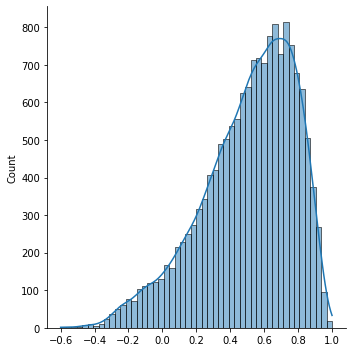

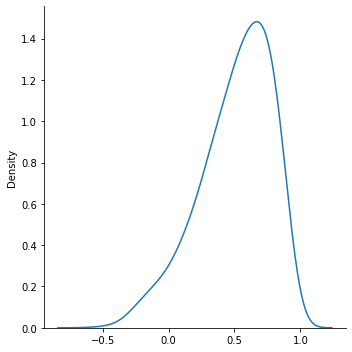

In [157]:
sns.displot(correlation, bins = 50, kde = True, legend=False)
sns.displot(correlation, kind="kde", bw_adjust=2, legend=False)

In [166]:
correlation=correlation.set_index(RiboSeq_RNASeq_HCC_counts.index)
correlation.rename(columns={0: "correlation"}, inplace = True)
correlation.head()

,correlation
geneSymbol,
TSPAN6,NaN
DPM1,0.849624
SCYL3,0.697779
C1orf112,0.811583
FGR,0.518673


In [161]:
print("Корреляция самая высокая для генов")
correlation[correlation["correlation"] > 0.99]

Корреляция самая высокая для генов


,correlation
geneSymbol,
PRG4,0.990977
FAM46D,1.000000
RFPL4B,1.000000


In [167]:
# Вышло как-то мало генов, понизим порог, так будет более заметна разница между генами с самой высокой корреляцией и низкой.
print("Корреляция самая высокая для генов")
correlation[correlation["correlation"] > 0.98].sort_values(by=['correlation'], ascending=False)

Корреляция самая высокая для генов


,correlation
geneSymbol,
FAM46D,1.000000
RFPL4B,1.000000
PRG4,0.990977
LGALS4,0.981942
CYP7A1,0.980820
HPR,0.980451
HKDC1,0.980053


In [188]:
print("All:")
print(sum(RiboSeq_RNASeq_HCC_counts.loc["FAM46D"].values))
print(sum(RiboSeq_RNASeq_HCC_counts.loc["RFPL4B"].values))
print(sum(RiboSeq_RNASeq_HCC_counts.loc["PRG4"].values))
print(sum(RiboSeq_RNASeq_HCC_counts.loc["LGALS4"].values))
print(sum(RiboSeq_RNASeq_HCC_counts.loc["CYP7A1"].values))
print(sum(RiboSeq_RNASeq_HCC_counts.loc["HPR"].values))
print(sum(RiboSeq_RNASeq_HCC_counts.loc["HKDC1"].values))

print("")
print("RNA:")
print(sum(RNA_RiboSeq_RNASeq_HCC_counts.loc["FAM46D"].values))
print(sum(RNA_RiboSeq_RNASeq_HCC_counts.loc["RFPL4B"].values))
print(sum(RNA_RiboSeq_RNASeq_HCC_counts.loc["PRG4"].values))
print(sum(RNA_RiboSeq_RNASeq_HCC_counts.loc["LGALS4"].values))
print(sum(RNA_RiboSeq_RNASeq_HCC_counts.loc["CYP7A1"].values))
print(sum(RNA_RiboSeq_RNASeq_HCC_counts.loc["HPR"].values))
print(sum(RNA_RiboSeq_RNASeq_HCC_counts.loc["HKDC1"].values))

print("")
print("RPF:")
print(sum(RPF_RiboSeq_RNASeq_HCC_counts.loc["FAM46D"].values))
print(sum(RPF_RiboSeq_RNASeq_HCC_counts.loc["RFPL4B"].values))
print(sum(RPF_RiboSeq_RNASeq_HCC_counts.loc["PRG4"].values))
print(sum(RPF_RiboSeq_RNASeq_HCC_counts.loc["LGALS4"].values))
print(sum(RPF_RiboSeq_RNASeq_HCC_counts.loc["CYP7A1"].values))
print(sum(RPF_RiboSeq_RNASeq_HCC_counts.loc["HPR"].values))
print(sum(RPF_RiboSeq_RNASeq_HCC_counts.loc["HKDC1"].values))

All:
5.0
128.0
127829.0
26112.0
12114.0
57249.0
6202.0

RNA:
4.0
57.0
27950.0
8545.0
2810.0
12375.0
2708.0

RPF:
1.0
71.0
99879.0
17567.0
9304.0
44874.0
3494.0


In [186]:
print("Корреляция самая низкая для генов")
correlation[correlation["correlation"] < -0.5].sort_values(by=['correlation'])

Корреляция самая низкая для генов


,correlation
geneSymbol,
LAT,-0.599996
RPH3A,-0.588242
C14orf28,-0.587297
SOX8,-0.561372
REM2,-0.551351
ZNF358,-0.531852


In [187]:
print("All:")
print(sum(RiboSeq_RNASeq_HCC_counts.loc["LAT"].values))
print(sum(RiboSeq_RNASeq_HCC_counts.loc["RPH3A"].values))
print(sum(RiboSeq_RNASeq_HCC_counts.loc["C14orf28"].values))
print(sum(RiboSeq_RNASeq_HCC_counts.loc["SOX8"].values))
print(sum(RiboSeq_RNASeq_HCC_counts.loc["REM2"].values))
print(sum(RiboSeq_RNASeq_HCC_counts.loc["ZNF358"].values))

print("")
print("RNA:")
print(sum(RNA_RiboSeq_RNASeq_HCC_counts.loc["LAT"].values))
print(sum(RNA_RiboSeq_RNASeq_HCC_counts.loc["RPH3A"].values))
print(sum(RNA_RiboSeq_RNASeq_HCC_counts.loc["C14orf28"].values))
print(sum(RNA_RiboSeq_RNASeq_HCC_counts.loc["SOX8"].values))
print(sum(RNA_RiboSeq_RNASeq_HCC_counts.loc["REM2"].values))
print(sum(RNA_RiboSeq_RNASeq_HCC_counts.loc["ZNF358"].values))

print("")
print("RPF:")
print(sum(RPF_RiboSeq_RNASeq_HCC_counts.loc["LAT"].values))
print(sum(RPF_RiboSeq_RNASeq_HCC_counts.loc["RPH3A"].values))
print(sum(RPF_RiboSeq_RNASeq_HCC_counts.loc["C14orf28"].values))
print(sum(RPF_RiboSeq_RNASeq_HCC_counts.loc["SOX8"].values))
print(sum(RPF_RiboSeq_RNASeq_HCC_counts.loc["REM2"].values))
print(sum(RPF_RiboSeq_RNASeq_HCC_counts.loc["ZNF358"].values))

All:
130.0
1056.0
514.0
282.0
72.0
3352.0

RNA:
53.0
1048.0
483.0
275.0
64.0
3106.0

RPF:
77.0
8.0
31.0
7.0
8.0
246.0


In [ ]:
# Можно отметить, что количество каунтов для генов с самой высокой корреляцией буквально в разы больше, чем для генов с самой низкой корреляцией.
# Кроме того для генов с самой высокой корреляцией количество каунтов эксперимента RNA-Seq меньше, чем в Ribo-Seq, а в случае для генов с самой низкой корреляцией ситуация противоположная.

**3. Найдите дифференциально экспрессированные гены по RNA-Seq между нормой и опухолью. Для этого можете использовать ​DESeq2​ или e​ dgeR​ (для DESeq есть о​ бёртка на Python). Постройте volcano plot. То же самое сделайте и для Ribo-Seq эксперимента. Совпадают ли результаты дифференциальной экспрессии? Какие гены оказались значимо различны по экспрессии в одном случае, а какие — в другом? Выводы подкрепите графиками.**